# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [37]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


In [38]:
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key
city = "albany"
city_url = url + "&q=" + "kingston"
weather_json = requests.get(city_url).json()
pprint(weather_json)
pprint(weather_json['main']['temp_max'])

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 17.997, 'lon': -76.7936},
 'dt': 1696200741,
 'id': 3489854,
 'main': {'feels_like': 309.56,
          'humidity': 83,
          'pressure': 1008,
          'temp': 302.56,
          'temp_max': 303.68,
          'temp_min': 301.6},
 'name': 'Kingston',
 'sys': {'country': 'JM',
         'id': 2036521,
         'sunrise': 1696157846,
         'sunset': 1696200974,
         'type': 2},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'thunderstorm',
              'icon': '11d',
              'id': 211,
              'main': 'Thunderstorm'}],
 'wind': {'deg': 130, 'speed': 3.09}}
303.68


---

## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [39]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&units=metric"
    weather_json = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = weather_json

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ouellah
City not found. Skipping...
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | klyuchi
Processing Record 4 of Set 1 | enterprise
Processing Record 5 of Set 1 | petropavlovsk-kamchatsky
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | isafjordur
Processing Record 8 of Set 1 | ebaye
Processing Record 9 of Set 1 | vaxjo
Processing Record 10 of Set 1 | mantua
Processing Record 11 of Set 1 | chonchi
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | qaqortoq
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | constantia
Processing Record 16 of Set 1 | taoudenni
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | al ghayzah
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | tieling
Processing Record 21 of Set 1 | port lincoln
Processing Recor

In [40]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [41]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,10.41,58,90,9.93,SH,1696201036
1,klyuchi,52.2667,79.1667,5.45,90,0,2.57,RU,1696201037
2,enterprise,36.0252,-115.2419,23.16,31,75,1.54,US,1696201037
3,petropavlovsk-kamchatsky,53.0452,158.6483,3.33,100,100,4.00,RU,1696201037
4,adamstown,-25.0660,-130.1015,20.40,82,11,11.34,PN,1696201037


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,10.41,58,90,9.93,SH,1696201036
1,klyuchi,52.2667,79.1667,5.45,90,0,2.57,RU,1696201037
2,enterprise,36.0252,-115.2419,23.16,31,75,1.54,US,1696201037
3,petropavlovsk-kamchatsky,53.0452,158.6483,3.33,100,100,4.00,RU,1696201037
4,adamstown,-25.0660,-130.1015,20.40,82,11,11.34,PN,1696201037


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

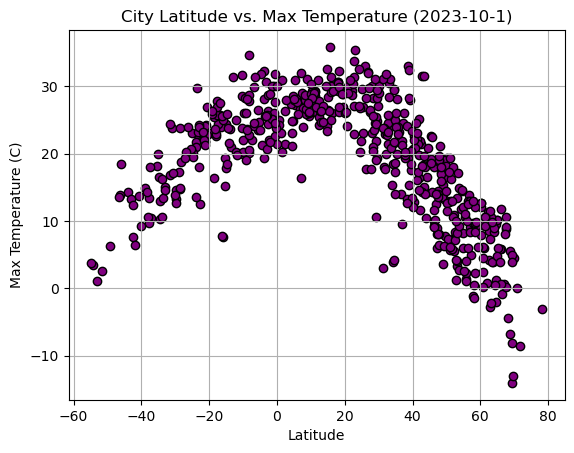

In [44]:
# Build scatter plot for latitude vs. temperature

#Create Scatter plot 
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c='purple', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2023-10-1)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

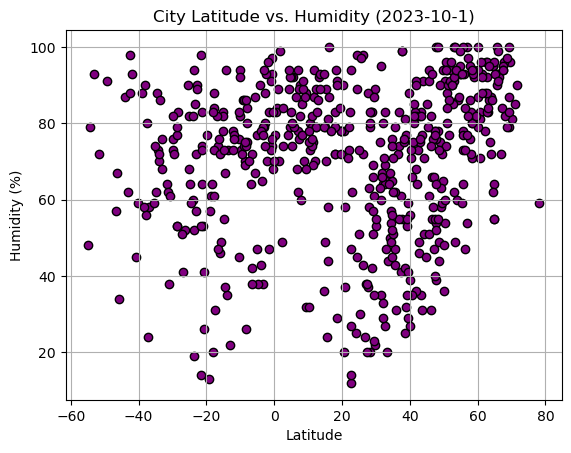

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c='purple', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-10-1)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

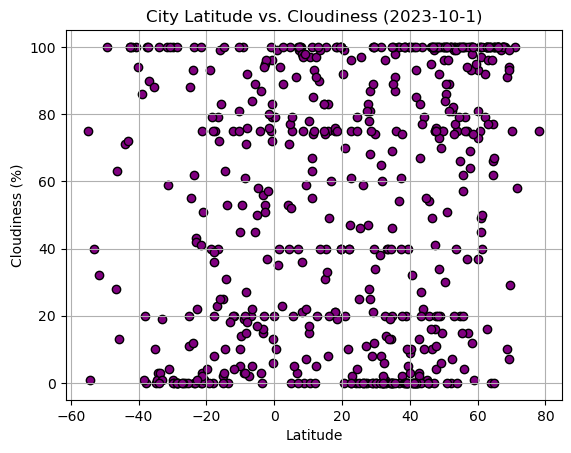

In [46]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], c='purple', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-10-1)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

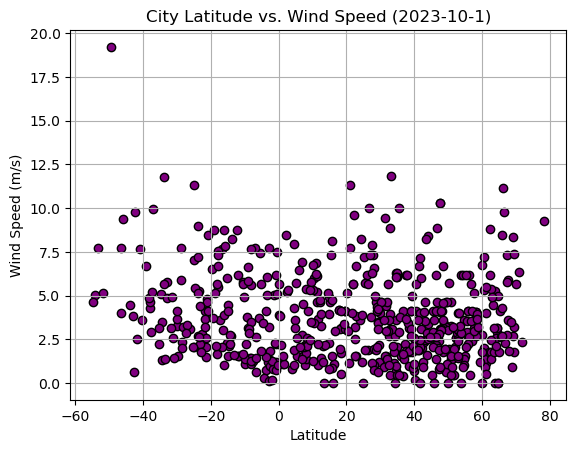

In [47]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], c='purple', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-10-1)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Compute Linear Regression for Each Relationship


In [111]:
# Define a function to create Linear Regression plots

def regression_plot(x, y, linex, liney):
    plt.scatter(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(linex, liney),fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")
    plt.show()


In [112]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,klyuchi,52.2667,79.1667,5.45,90,0,2.57,RU,1696201037
2,enterprise,36.0252,-115.2419,23.16,31,75,1.54,US,1696201037
3,petropavlovsk-kamchatsky,53.0452,158.6483,3.33,100,100,4.00,RU,1696201037
5,isafjordur,66.0755,-23.1240,5.77,93,100,11.17,IS,1696200849
6,ebaye,8.7748,167.7392,31.01,70,0,4.12,MH,1696201037


In [113]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,10.41,58,90,9.93,SH,1696201036
4,adamstown,-25.0660,-130.1015,20.40,82,11,11.34,PN,1696201037
9,chonchi,-42.6128,-73.8092,7.56,98,100,0.64,CL,1696201037
10,waitangi,-43.9535,-176.5597,14.34,87,71,4.47,NZ,1696201038
12,grytviken,-54.2811,-36.5092,3.46,79,1,5.01,GS,1696200837


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8240761598561888


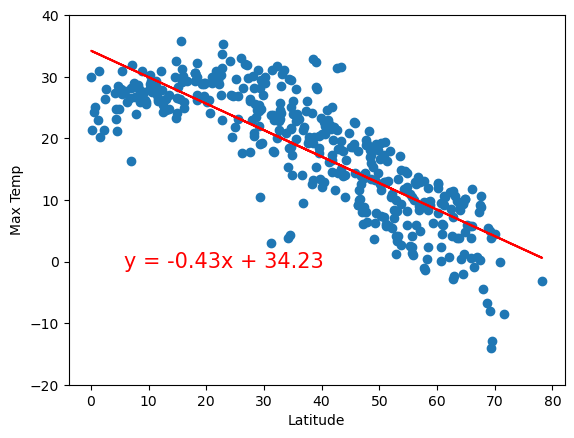

In [114]:
# Linear regression on Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.ylim(-20,40)
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 5.8, -1)

The r-value is: 0.7706639094551376


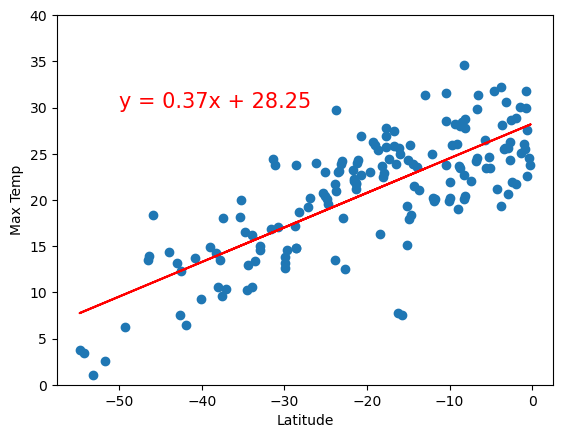

In [116]:
# Linear regression on Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.ylim(0,40)
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], -50, 30)

**Discussion about the linear relationship:** In both graphs we can see a somewhat strong linear relationship. The biggest difference between the two is the north hemisphere plot has a negative relationship with maximum temperature and southern has a positive relationship. This means that as the latitude increases in the northern hemisphere the max temperature goes down. Whereas, for the southern hemisphere as the latitude increase the maximum temperature increases. These trends are making sense give the Earth's geography. For example, the temperature going up in the southern hemisphere as the latitude increases make sense as you are getting closer to the equator of the Earth.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1840214371566232


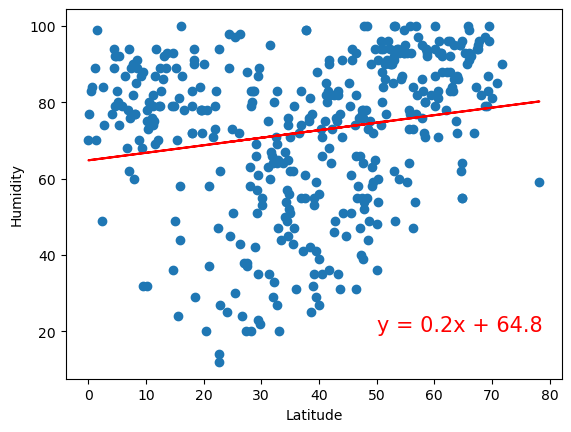

In [120]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity')
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 50, 20)

The r-value is: 0.06988864899170312


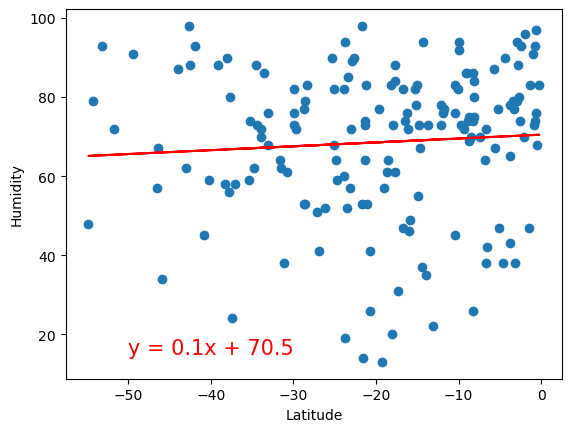

In [122]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Humidity')
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], -50, 15)

**Discussion about the linear relationship:** In both, graphs we can see a very weak linear realtionship. Essentially, the data points in the graph are scattered and do not follow a clear linear pattern. Therefore, there is little to no relationship between the cities latitude and humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.18777536431011663


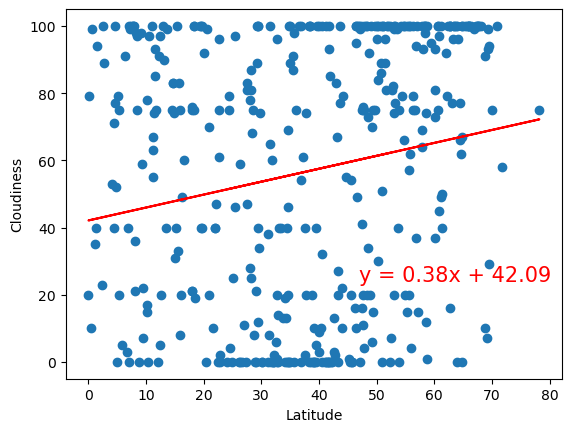

In [125]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 47, 24)

The r-value is: 0.013470624103095031


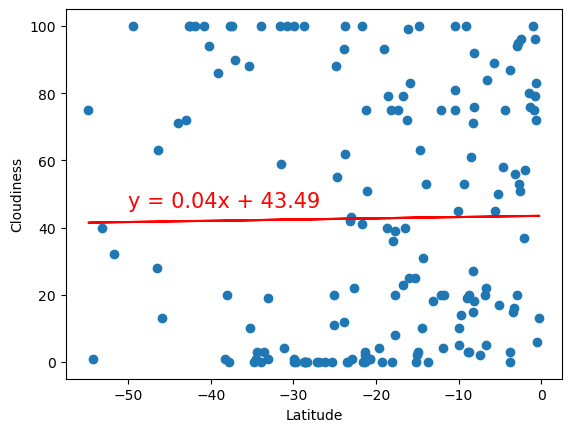

In [128]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], -50, 46)

**Discussion about the linear relationship:** In both, graphs we can see a very weak linear realtionship. Essentially, the data points in the graph are scattered and do not follow a clear linear pattern. Therefore, there is little to no relationship between the cities latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.02218579875454865


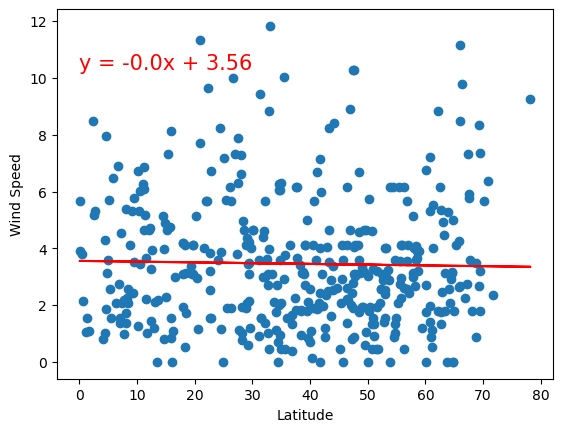

In [133]:
# Northern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 0, 10.3)

The r-value is: -0.31612825640002046


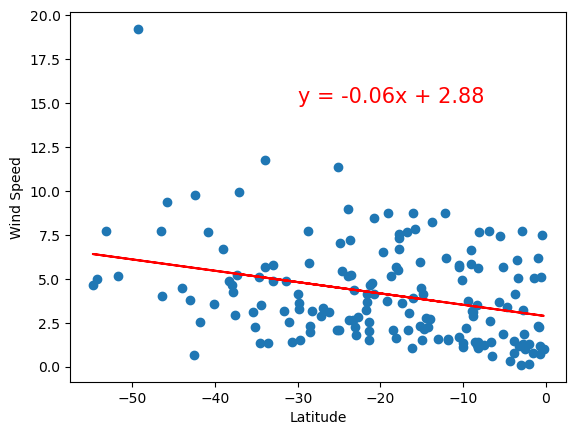

In [136]:
# Southern Hemisphere
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], -30, 15)

**Discussion about the linear relationship:** In both, graphs we can see a very weak linear realtionship. Essentially, the data points in the graph are scattered and do not follow a clear linear pattern. Therefore, there is little to no relationship between the cities latitude and wind speed. 